In [15]:
import sys
import os
import json
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Tools import *
from Clusters import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [16]:
method = "dbsan"
def train(name, data, decay = 10):
    model = DBSCAN(data, 1)
    centroids, labels = model()
    print(centroids)
    print(labels)
    s_score = silhouette_score(data, labels, metric='euclidean')
    d_score = davies_bouldin_score(data, labels)
    print(s_score)
    print(d_score)
    np.save(f'../Lib/Centroids/{name}_{method}.npy', centroids)
    np.save(f'../Lib/Labels/{name}_{method}.npy', labels)
    result = {
        "silhouette_score": s_score,
        "davies_bouldin_index": d_score
    }
    with open(f'../Lib/Score/{name}_{method}.json', 'w', encoding='utf-8') as rank:
        json.dump(result, rank, ensure_ascii=False, indent=4)
    return (centroids, labels), (s_score, d_score)

def visualize(name, index, data, centroids, labels, labels_name): 
    indexs = [item for item in range(len(labels_name)) if item != index]
    X_reduced = data
    final_centroids_reduced = centroids
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].scatter(X_reduced[:, index], X_reduced[:, indexs[0]], c=labels, cmap='viridis', s=50)
    axes[0].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[0]], c='red', s=200, alpha=0.75, marker='X')
    axes[0].set_xlabel(f'{labels_name[index]}')
    axes[0].set_ylabel(f'{labels_name[indexs[0]]}')
    axes[0].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[0]]}')

    axes[1].scatter(X_reduced[:, index], X_reduced[:, indexs[1]], c=labels, cmap='viridis', s=50)
    axes[1].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[1]], c='red', s=200, alpha=0.75, marker='X')
    axes[1].set_xlabel(f'{labels_name[index]}')
    axes[1].set_ylabel(f'{labels_name[indexs[1]]}')
    axes[1].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[1]]}')

    fig.savefig(f'../Lib/Images/{name}_{labels_name[index]}_{method}.png', dpi=300, bbox_inches='tight')
    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# FoundationCourses

In [17]:
name_data = "FoundationCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[ 8.17115024  7.23000395  5.17412306]
 [ 6.61549579  3.52577243  0.        ]
 [ 6.71875     2.01618393  1.23155573]
 [10.875       9.2831651   7.73905561]
 [ 4.25        3.31900711  1.87601203]
 [ 5.33470696  4.52116477  2.21202072]
 [        nan         nan         nan]]
[-1  0 -1  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0  1  0  0  2  1  0
  0  1  0 -1  0  0  0  0 -1  0  0  0  0  3  1  1  0  1  0  1 -1  1  0  0
  0  0  1  4  0  1  0  1  0  0  1  0  0  0  0  0  0 -1  0  1  4  1  0 -1
  1  1 -1  1  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  1
  0  0  0  0  1  0  0  0  0  0  1  1 -1  1  0  3  4  1  0  0  1  1  1  0
  0 -1  0  1  0 -1  0  1  1 -1 -1  1  1  0  1  4  0  0  0  0  1 -1  4  0
  0  0 -1  0  0  1  0  0  0  4  0  0  0  0  0  0  0  0  0  2  0  0  0  1
  0  0  1  0  0  0  0  0  1  0  0  0  5  0  0  1  0  0  0  0  0  0  1  1
  1  0 -1  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  1  0  0  0  0  0  1
  0  0  0  0  0  4  0  0  0  1  0  4  0  0 -1  0  0  1  0  0  0  5  5

d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


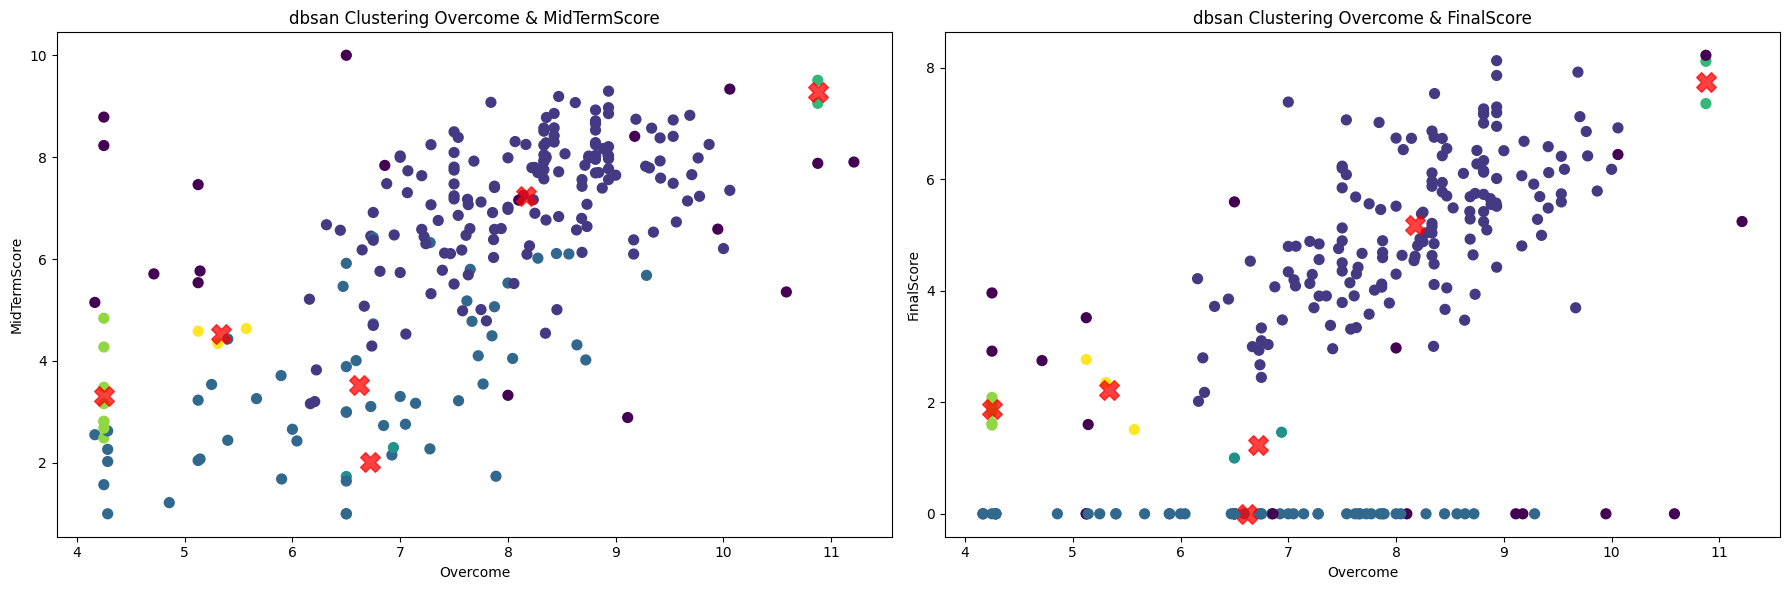

In [18]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

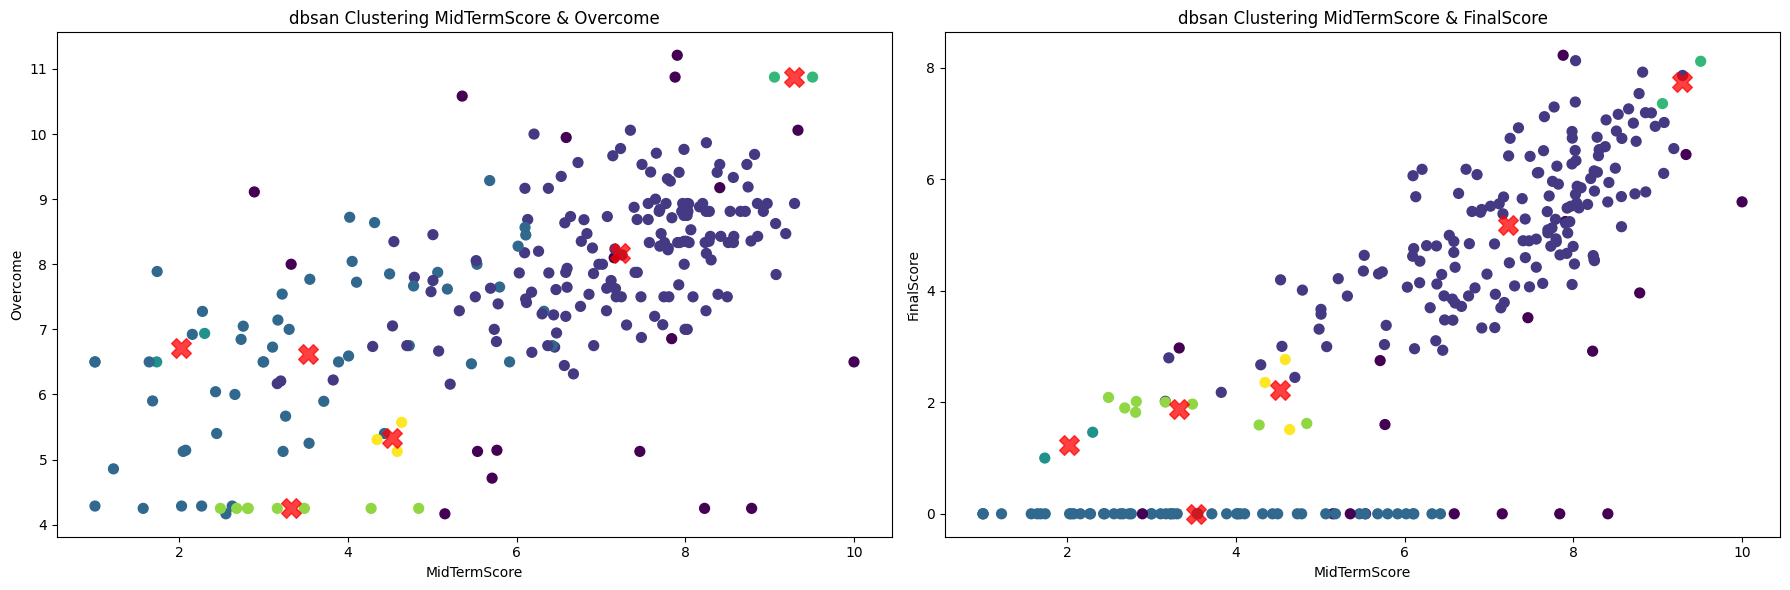

In [19]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

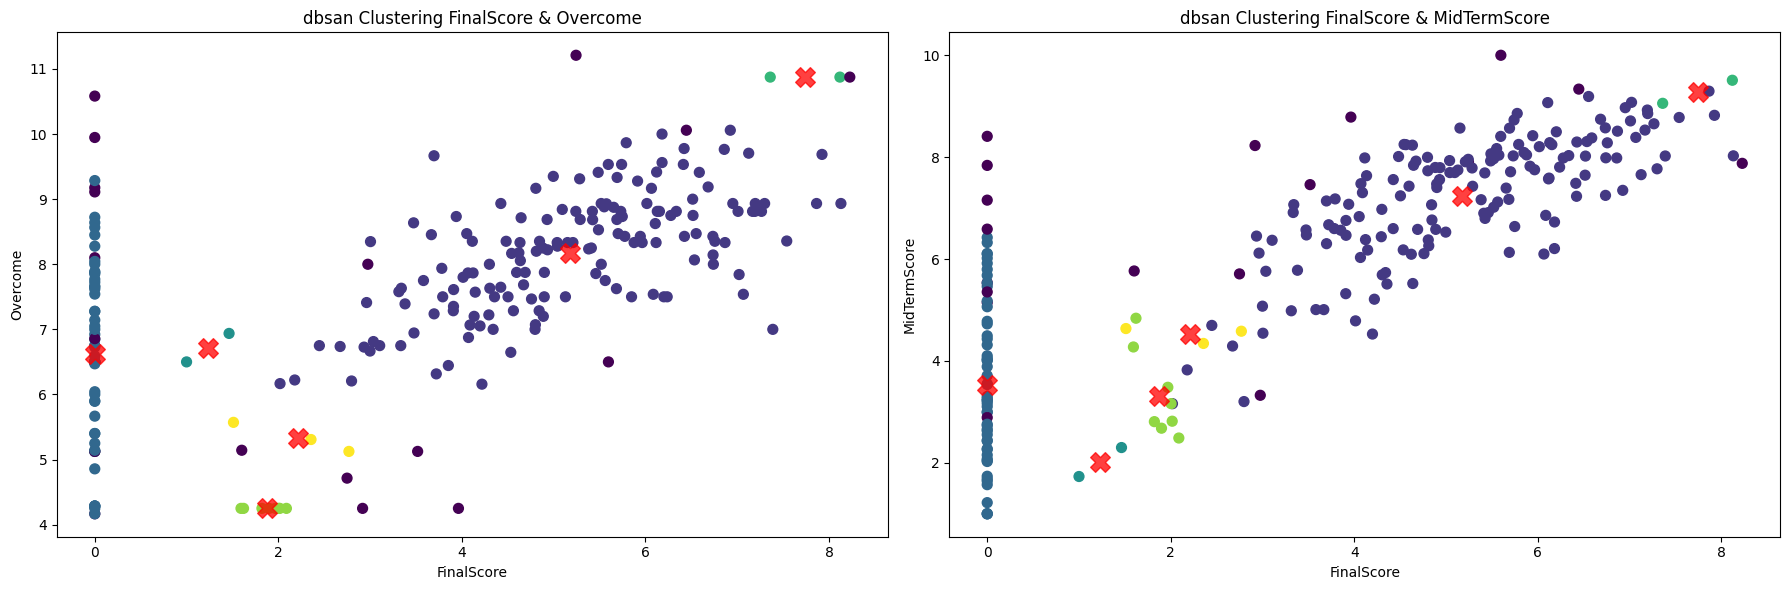

In [20]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# GeneralCourses

In [21]:
name_data = "GeneralCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[ 8.44376734  7.65867707  0.        ]
 [10.4901667   0.          6.72537713]
 [ 8.18394869  7.76621704  6.56241042]
 [ 6.18887987  4.42796231  0.        ]
 [ 2.5         1.68214256  0.        ]
 [ 2.5         4.54253514  0.        ]
 [ 6.72222222  7.94100698  0.        ]
 [ 8.9         5.79007103  4.88992697]
 [ 4.53492063  1.50809253  0.        ]
 [ 8.51565657  5.66157497  6.69821453]
 [        nan         nan         nan]]
[ 0  1  2  2  3  1  1  2  2  2  1  2  2  2  2  2  2  2  4  2  2  5  4  2
  2  5  1  2  1  2  2  2  3  1  2  2  2  1  2  0  2  3  1  4  2  6  1  1
  2  2  3 -1  1  4  2  2  2  2  2  2 -1  2  1  2  2  2  1  7  3  2  2 -1
  6  3  2  2  2  2  8  2  2  1  2  2 -1  2  2  2  2  2  2  3  1  2  2  2
  2  1 -1  0  2  2  1  1  2  2  3  1  2  3  2  2  3  3  2  2  2  9  9  2
  0  2  1  3  2  2  2  9  2  2  2  3  2  1  3  3  2  2  1  2  8  2  3  1
  2  2 -1  2  1  3  2  2  2  3  2  1  2  2  2  1  2  2  2 -1  2  2 -1  3
  2  2  1  0  2 -1 -1  0  2  2  2  1  2  2  2  3  2  2  2  

d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


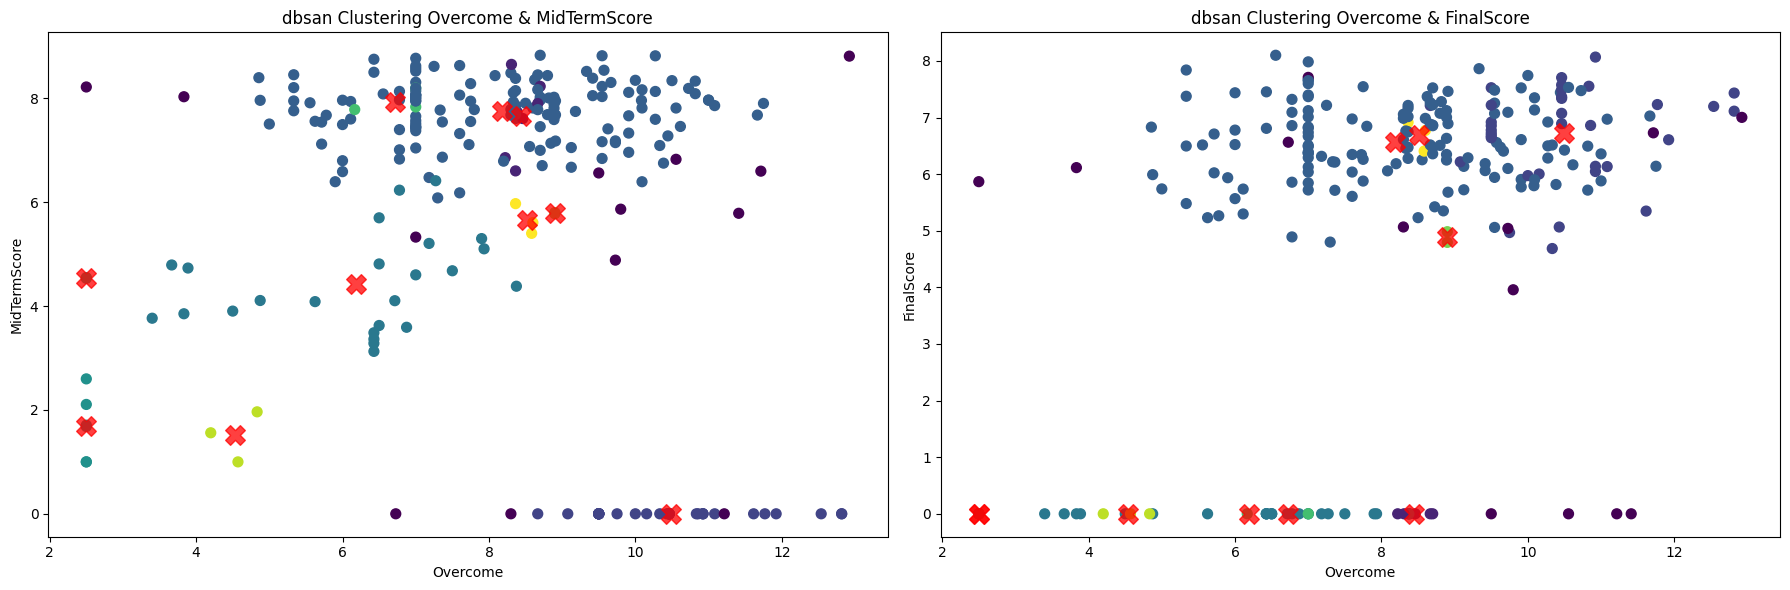

In [22]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

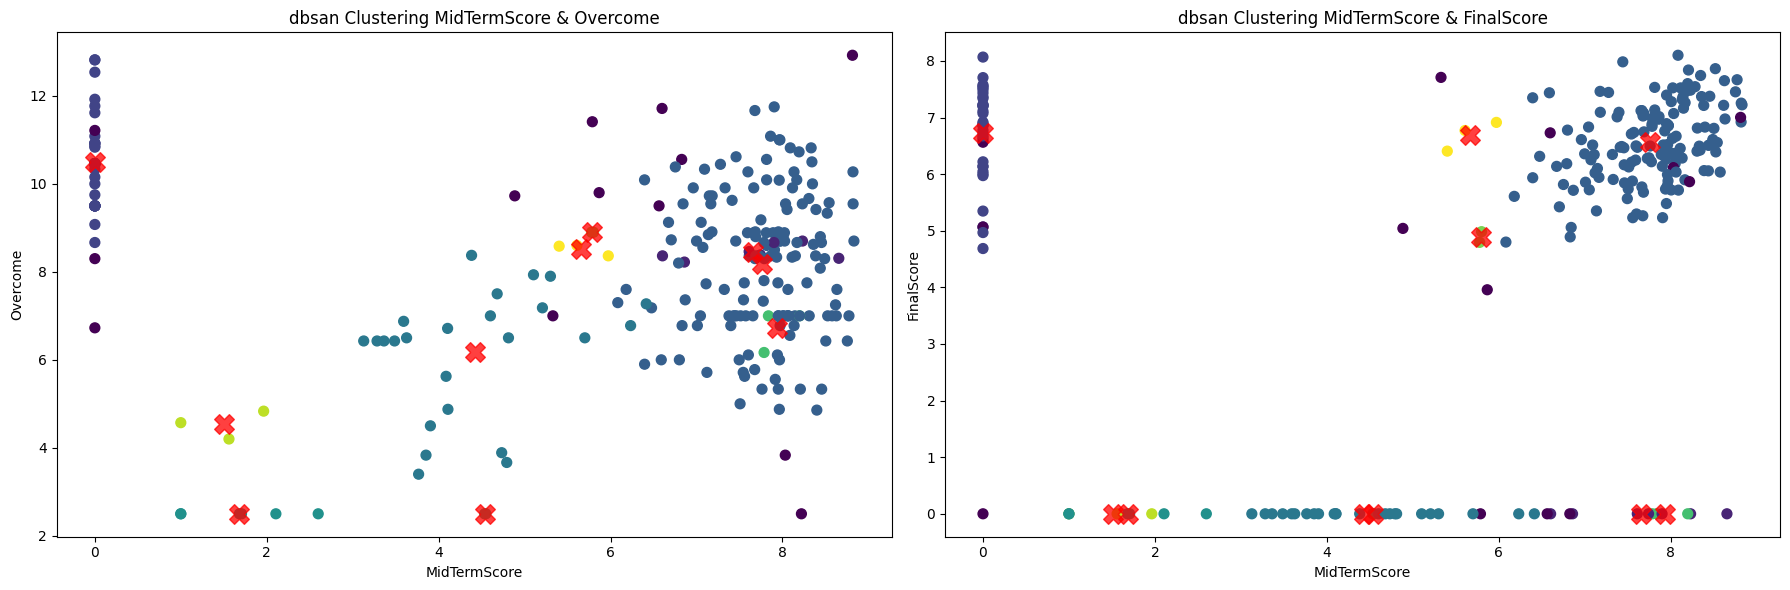

In [23]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

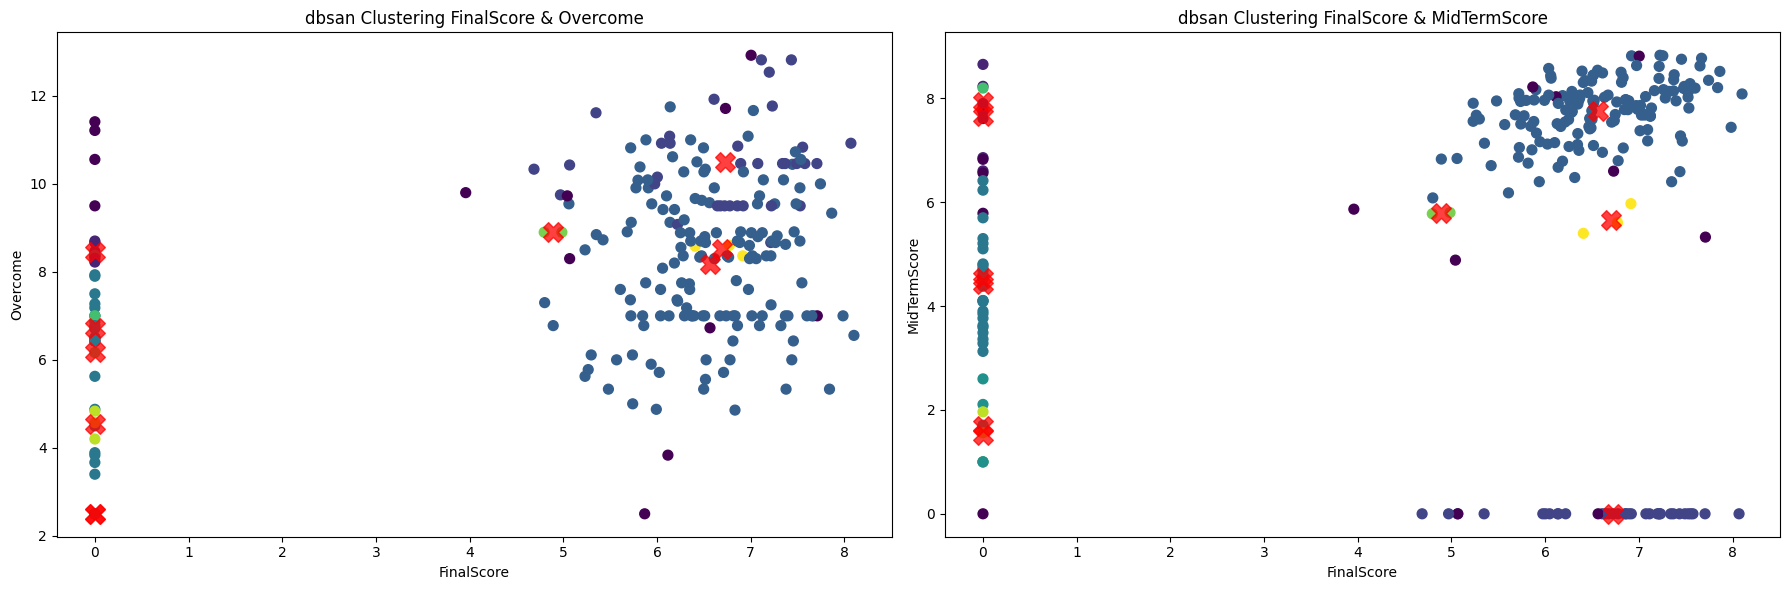

In [24]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# MajorCourses

In [25]:
name_data = "MajorCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[13.9411105   7.82344904  7.73497599]
 [ 1.          1.          1.        ]
 [12.84791667  6.84677713  4.77522916]
 [ 8.35        2.3753324   2.37054224]
 [20.02491987  7.85179561  7.06448903]
 [12.21590909  5.12585862  5.50239481]
 [ 1.          7.5         1.        ]
 [        nan         nan         nan]]
[-1  0 -1  0  1  0  0  0  0 -1  0 -1 -1  0  0  0 -1  0  0  0  0 -1  0 -1
  0  0 -1  0 -1 -1  0  0  0  0  2  0  0  1  0  0  0  0  0  0  1  0  0  0
  0  0 -1  0  0  0  0  0  0  0 -1 -1  0 -1  3 -1 -1  2  0  0  0  0  0  0
  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  4  0  0 -1
  0 -1  0  0 -1  0  0  0  3 -1  0  0  0  0  0  0 -1  0  0  0  5  0  0  0
  0  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  5  0 -1  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0  4  0  0 -1  0  0  4  0  6  0  0  0  0  0 -1  0  0 -1  0  0 -1  0
  0  0  0  4  0  0  0  0  0  0 -1  0  0  6  0  0  0 -1  0  0  0]
0.12788017882715635
1.5657335619662707

d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


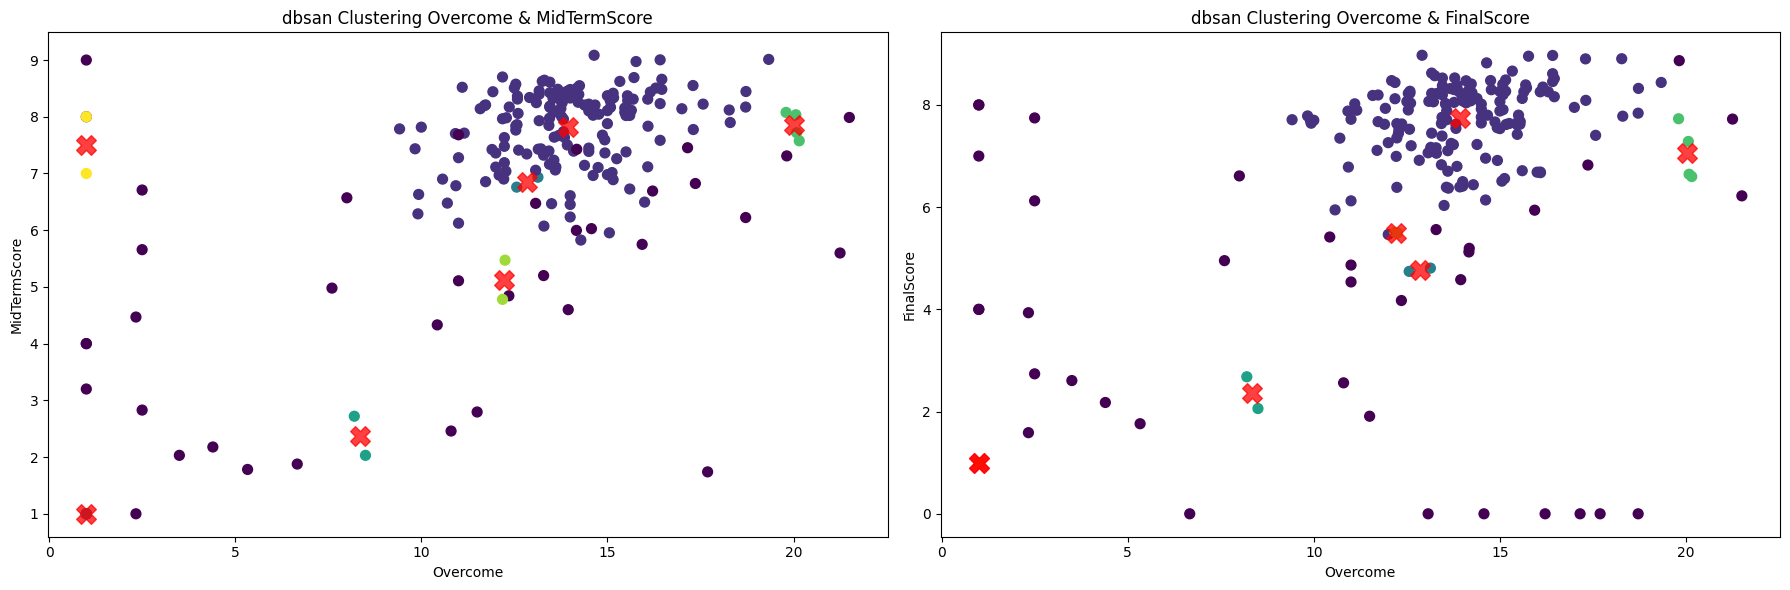

In [26]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

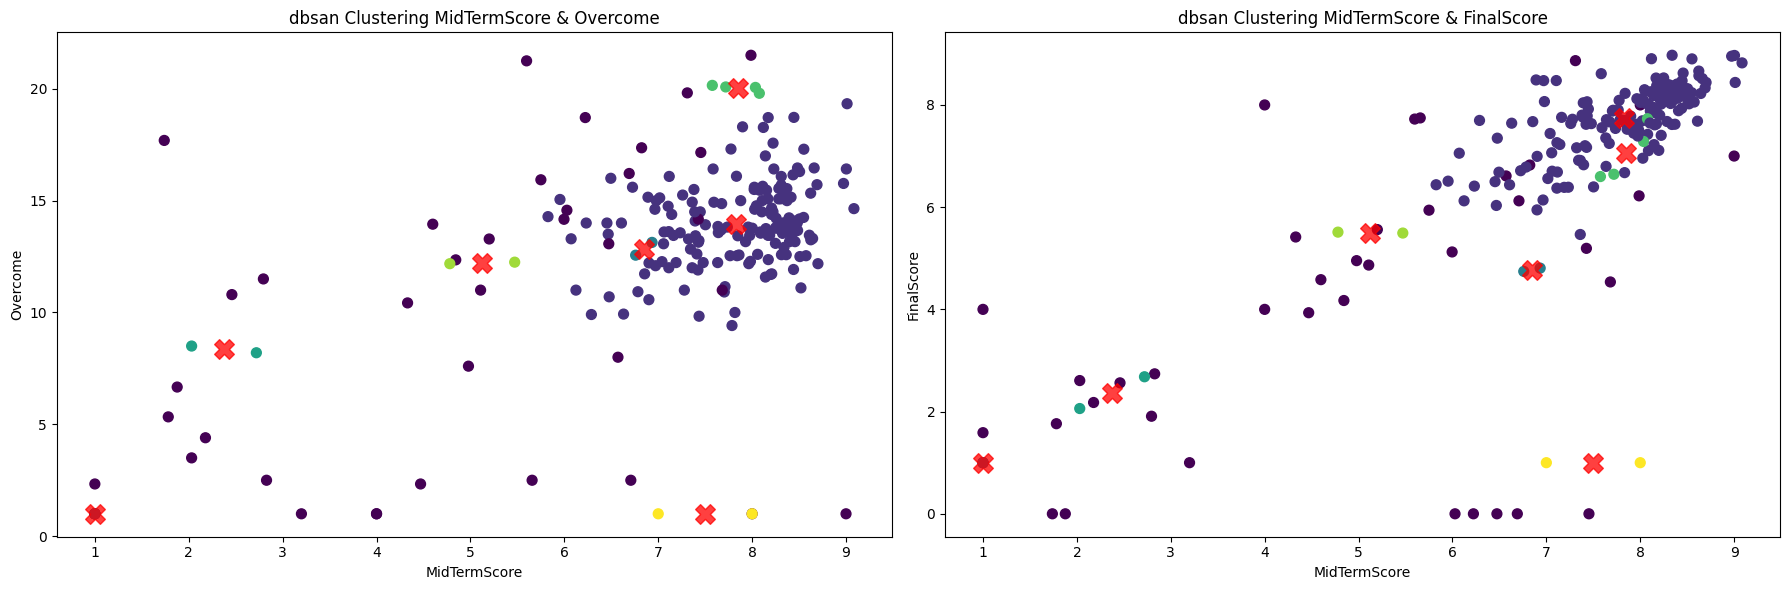

In [27]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

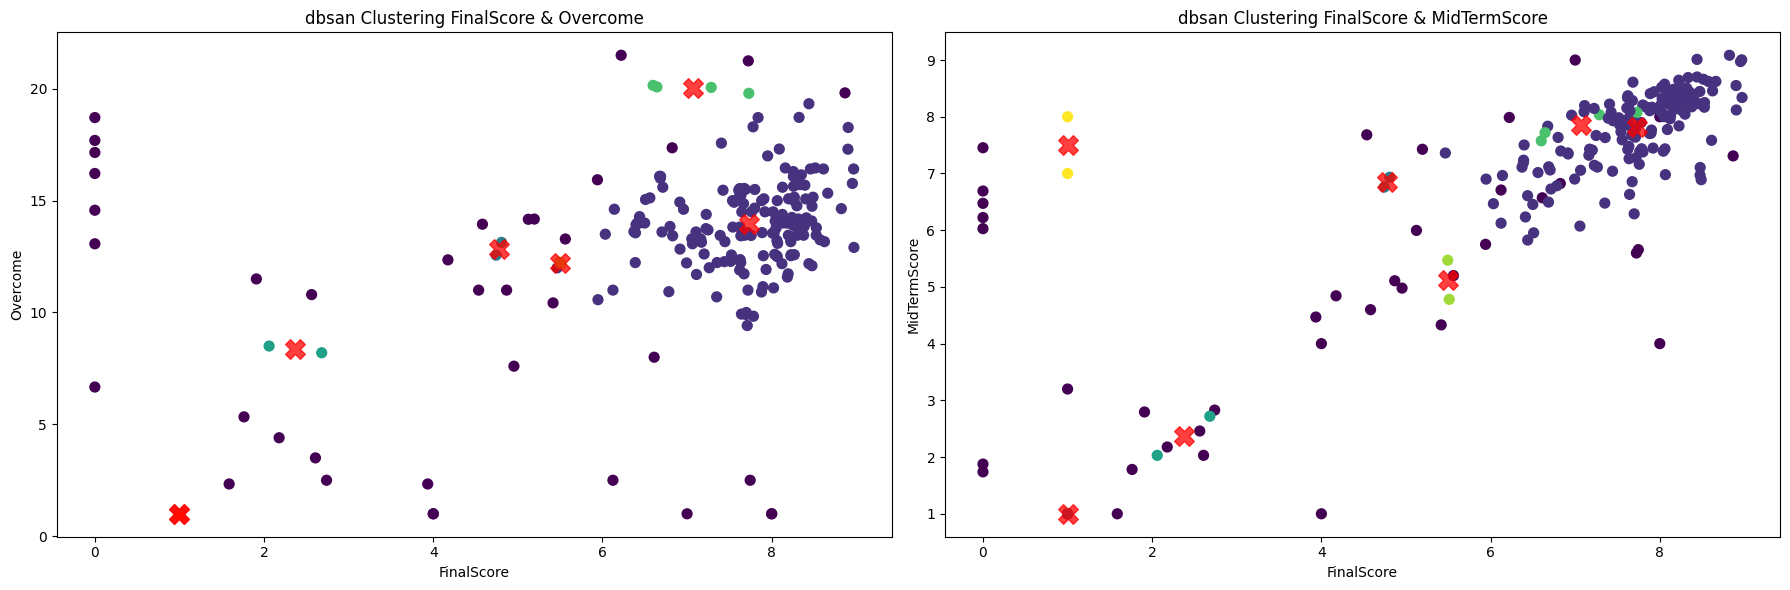

In [28]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)